In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the AirPassengers dataset
airline = pd.read_csv(r'C:\Users\sr528\OneDrive\Desktop\hh\AirPassengers.csv',
					index_col ='Month',
					parse_dates = True)

# Print the first five rows of the dataset
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


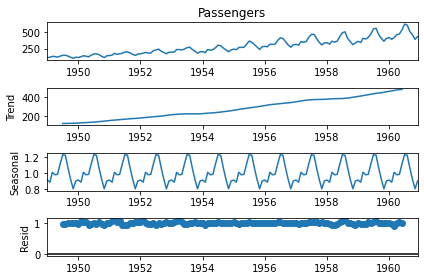

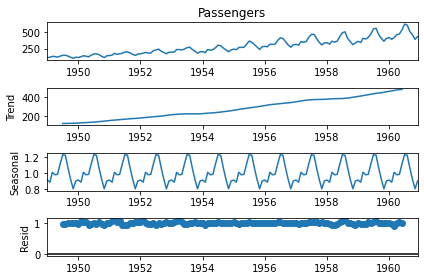

In [3]:
# ETS Decomposition
result = seasonal_decompose(airline['Passengers'],
							model ='multiplicative')

# ETS plot
result.plot()

In [4]:
!pip install pmdarima

In [5]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.07 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.15 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.22 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.05 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 07 Feb 2022   AIC                           1019.178
Time:                                     15:42:12   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

In [7]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.014
Date:                            Mon, 07 Feb 2022   AIC                            896.028
Time:                                    15:42:13   BIC                            909.924
Sample:                                01-01-1949   HQIC                           901.670
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2985      0.075     -3.974      0.000      -0.446      -0.151
ar.S.L12       0.7096      0.234      3.032      0.002       0.251       1.168
ar.S.L24       0.2895      0.100      2.887      0.004       0.093       0.486
ma.S.L12      -0.9793      2.133     -0.459      0.646      -5.160       3.201
sigma2        88.3319    169.148      0.522      0.602    -243.192     419.856
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

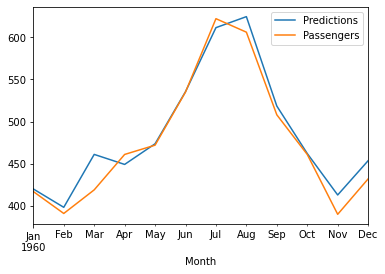

In [8]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Passengers"], predictions)

# Calculate mean squared error
mean_squared_error(test["Passengers"], predictions)

# Train the model on the full dataset
model = SARIMAX(airline['Passengers'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

<AxesSubplot:xlabel='Month'>

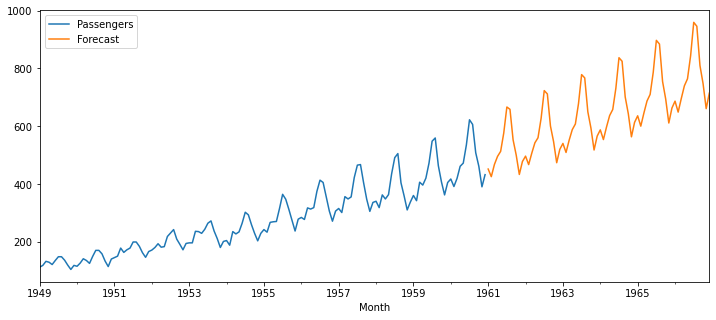

In [10]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 6 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


In [11]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 6 * 12,
						typ = 'levels').rename('Forecast')


In [12]:
ts = airline["Passengers"]

In [13]:
a = pd.DataFrame(ts)

In [14]:
#px.line(airline, template = 'plotly_dark')
#px.line(forecast, template = 'plotly_dark')

In [15]:
px.line(airline["Passengers"],template = 'plotly_dark')

In [16]:

px.line(forecast,template = 'plotly_dark')

In [17]:
 #forecast = result.predict(start = 508, end =533, dynamic =True)
 #px.line(result, x='Month', y= ['Price','forecast'],template = 'plotly_dark')

In [18]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 6 * 12,
						typ = 'levels', dynamic =True).rename('Forecast') 
px.line(forecast,  template = 'plotly_dark')

In [19]:
import plotly.express as px

import pandas as pd

fig = px.line(forecast)
fig.show()

In [20]:
import plotly.express as px
df = px.data.stocks()
fig = px.line(forecast,
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [21]:
a = pd.concat([airline,forecast],axis=1)

In [22]:
a

,Passengers,Forecast
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1966-08-01,NaN,945.636406
1966-09-01,NaN,809.753230
1966-10-01,NaN,747.053819
1966-11-01,NaN,660.616895


In [23]:

px.line(a,template = 'plotly_dark')